### 101040 모델 (6/23 ~ 6/26)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
d1 = pd.read_csv("LOT1_20210623100257.csv")
d2 = pd.read_csv("LOT1_20210624093425.csv")
d3 = pd.read_csv("LOT1_20210624201454.csv")
d4 = pd.read_csv("LOT1_20210625012652.csv")
d5 = pd.read_csv("LOT1_20210625074117.csv")
d6 = pd.read_csv("LOT1_20210625111428.csv")
d7 = pd.read_csv("LOT1_20210626093849.csv")

In [3]:
d1 = d1.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26'], axis=1)
d2 = d2.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26'], axis=1)
d3 = d3.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26'], axis=1)
d4 = d4.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26'], axis=1)
d5 = d5.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26'], axis=1)
d6 = d6.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26'], axis=1)
d7 = d7.drop(['DUT_ID', 'MACHINE', 'REMARK', 'Unnamed: 26'], axis=1)

In [4]:
df = pd.concat([d1, d2, d3, d4, d5, d6, d7])
df.head()

,NUM,CH,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,...,[SEQ3] Noise Band1,[SEQ4] F0 Vibration,[SEQ4] Noise Touch,[SEQ4] Noise THD1,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,PASS/FAIL,DATE,MODEL
0,1,CH1,4.5,18.6,294.5,1.11,0.0,4.1,0.0,168.6,...,0.4,1.17,0.8,3.6,0.0,1.71,1.31,PASS,2021-06-23 10:05:07,101040SB Alert_FILE HUBBLE them 165hz
1,1,CH2,5.8,17.1,299.9,1.09,6.2,4.0,2.3,167.1,...,1.3,1.08,0.0,4.7,0.0,1.63,1.24,PASS,2021-06-23 10:05:09,101040SB Alert_FILE HUBBLE them 165hz
2,1,CH3,6.2,20.5,305.7,0.99,0.0,2.9,0.0,171.7,...,0.1,1.10,1.1,2.8,0.0,1.53,1.15,PASS,2021-06-23 10:05:11,101040SB Alert_FILE HUBBLE them 165hz
3,1,CH4,6.2,19.1,302.1,1.11,0.0,3.6,0.0,172.9,...,1.3,1.11,0.0,3.3,0.0,1.77,1.38,PASS,2021-06-23 10:05:14,101040SB Alert_FILE HUBBLE them 165hz
4,1,CH6,6.4,19.7,309.1,1.07,0.0,3.7,0.0,172.9,...,3.8,1.10,1.9,3.3,0.0,1.73,1.33,PASS,2021-06-23 10:05:16,101040SB Alert_FILE HUBBLE them 165hz


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21785 entries, 0 to 3841
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NUM                   21785 non-null  int64         
 1   CH                    21785 non-null  object        
 2   [SEQ1]  RisingTime    21785 non-null  float64       
 3   [SEQ1]  FallingTime   21785 non-null  float64       
 4   [SEQ2]  F0 Current    21785 non-null  float64       
 5   [SEQ2]  F0 Vibration  21785 non-null  float64       
 6   [SEQ2]  Noise Touch   21785 non-null  float64       
 7   [SEQ2]  Noise THD1    21785 non-null  float64       
 8   [SEQ2]  Noise Band1   21785 non-null  float64       
 9   [SEQ3]  F0 Frequency  21785 non-null  float64       
 10  [SEQ3]  F0 Vibration  21785 non-null  float64       
 11  [SEQ3]  Noise Touch   21785 non-null  float64       
 12  [SEQ3]  Noise THD1    21785 non-null  float64       
 13  [SEQ3]  Noise Ban

In [6]:
df.set_index('DATE', drop=True, inplace=True)
df.head()

,NUM,CH,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,...,[SEQ3] Noise THD1,[SEQ3] Noise Band1,[SEQ4] F0 Vibration,[SEQ4] Noise Touch,[SEQ4] Noise THD1,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,PASS/FAIL,MODEL
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-23 10:05:07,1,CH1,4.5,18.6,294.5,1.11,0.0,4.1,0.0,168.6,...,4.4,0.4,1.17,0.8,3.6,0.0,1.71,1.31,PASS,101040SB Alert_FILE HUBBLE them 165hz
2021-06-23 10:05:09,1,CH2,5.8,17.1,299.9,1.09,6.2,4.0,2.3,167.1,...,3.0,1.3,1.08,0.0,4.7,0.0,1.63,1.24,PASS,101040SB Alert_FILE HUBBLE them 165hz
2021-06-23 10:05:11,1,CH3,6.2,20.5,305.7,0.99,0.0,2.9,0.0,171.7,...,1.6,0.1,1.10,1.1,2.8,0.0,1.53,1.15,PASS,101040SB Alert_FILE HUBBLE them 165hz
2021-06-23 10:05:14,1,CH4,6.2,19.1,302.1,1.11,0.0,3.6,0.0,172.9,...,6.0,1.3,1.11,0.0,3.3,0.0,1.77,1.38,PASS,101040SB Alert_FILE HUBBLE them 165hz
2021-06-23 10:05:16,1,CH6,6.4,19.7,309.1,1.07,0.0,3.7,0.0,172.9,...,5.2,3.8,1.10,1.9,3.3,0.0,1.73,1.33,PASS,101040SB Alert_FILE HUBBLE them 165hz


In [7]:
df_mean = df.resample(rule='D').mean()
df_mean

,NUM,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,[SEQ3] F0 Vibration,[SEQ3] Noise Touch,[SEQ3] Noise THD1,[SEQ3] Noise Band1,[SEQ4] F0 Vibration,[SEQ4] Noise Touch,[SEQ4] Noise THD1,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration
DATE,,,,,,,,,,,,,,,,,,,
2021-06-23,391.900102,5.662621,19.535897,298.815304,1.044034,0.913746,3.616684,1.678283,170.038707,2.618319,18.023761,4.265074,1.588350,1.099359,5.441364,3.493025,1.096857,1.639663,1.266916
2021-06-24,225.758942,5.748856,19.926483,300.850078,1.034457,0.595668,3.768585,1.601955,170.736747,2.676307,18.026727,4.117085,1.394068,1.076694,4.426239,3.628949,0.971517,1.682462,1.282431
2021-06-25,324.928580,5.823708,20.154019,301.465235,0.981831,0.488956,3.590023,1.186882,172.466192,2.695329,18.076684,3.800258,1.263357,1.085282,4.433427,3.472107,0.676697,1.565089,1.200130
2021-06-26,548.009002,5.763149,19.582283,300.939284,1.022739,0.506340,3.674373,1.569508,171.125014,2.667771,18.044493,3.860525,1.613158,1.100065,4.771097,3.476480,1.141122,1.622348,1.240230


### 6/23 ~ 6/26일간의 SEQ1, SEQ2의 값 비교 및 추이 확인

### 응답속도
#### [SEQ1] RisingTime

In [8]:
SEQ1_RisingTime = pd.DataFrame(df_mean, columns= ['[SEQ1]  RisingTime'])
SEQ1_RisingTime

,[SEQ1] RisingTime
DATE,
2021-06-23,5.662621
2021-06-24,5.748856
2021-06-25,5.823708
2021-06-26,5.763149


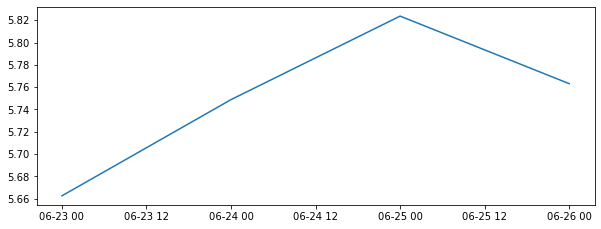

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ1]  RisingTime'])

#### [SEQ1] FallingTime

In [29]:
SEQ1_RisingTime = pd.DataFrame(df_mean, columns= ['[SEQ1]  FallingTime'])
SEQ1_RisingTime

,[SEQ1] FallingTime
DATE,
2021-06-23,19.535897
2021-06-24,19.926483
2021-06-25,20.154019
2021-06-26,19.582283


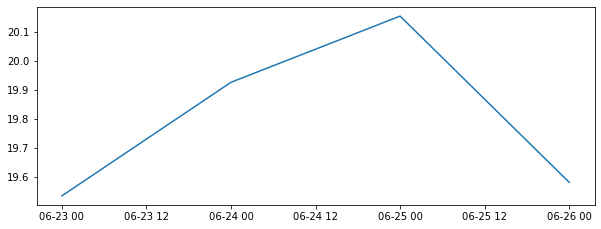

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ1]  FallingTime'])

#### [SEQ2] F0 Current / 소비전류

In [31]:
SEQ2_Current = pd.DataFrame(df_mean, columns= ['[SEQ2]  F0 Current'])
SEQ2_Current

,[SEQ2] F0 Current
DATE,
2021-06-23,298.815304
2021-06-24,300.850078
2021-06-25,301.465235
2021-06-26,300.939284


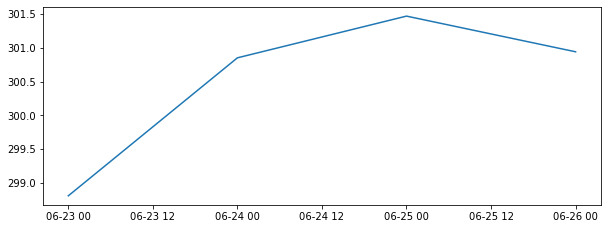

In [32]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ2]  F0 Current'])

#### [SEQ2] F0 Vibration / 진동력

In [33]:
SEQ2_Vibration = pd.DataFrame(df_mean, columns= ['[SEQ2]  F0 Vibration'])
SEQ2_Vibration

,[SEQ2] F0 Vibration
DATE,
2021-06-23,1.044034
2021-06-24,1.034457
2021-06-25,0.981831
2021-06-26,1.022739


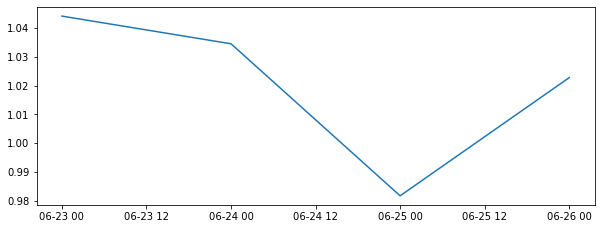

In [34]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ2]  F0 Vibration'])

#### [SEQ3]  F0 Frequency / 주파수(HZ)

In [39]:
df_mean['[SEQ3]  F0 Frequency'].dropna()

DATE
2021-06-23    170.038707
2021-06-24    170.736747
2021-06-25    172.466192
2021-06-26    171.125014
Freq: D, Name: [SEQ3]  F0 Frequency, dtype: float64

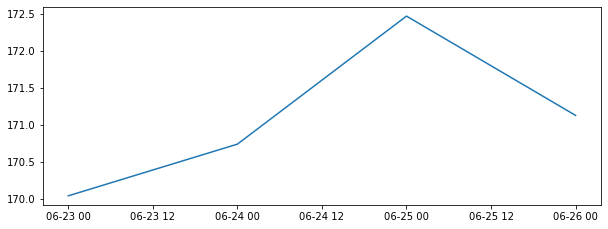

In [41]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ3]  F0 Frequency'])

#### [SEQ3] F0 Vibration / 진동력

In [42]:
SEQ3_Vibration = pd.DataFrame(df_mean, columns= ['[SEQ3]  F0 Vibration'])
SEQ3_Vibration

,[SEQ3] F0 Vibration
DATE,
2021-06-23,2.618319
2021-06-24,2.676307
2021-06-25,2.695329
2021-06-26,2.667771


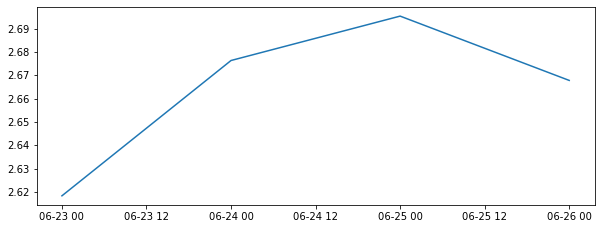

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ3]  F0 Vibration'])

##### [SEQ3]의 주파수와 진동값은 6/23~6/26일 중 6/25가 가장 높은 수치로 나타났다.
##### 그래프의 형태는 어느 정도 비슷한 추이를 보인다. (상관관계를 통해 자세히 알아볼 것.)

#### [SEQ4]  F0 Vibration / 진동력

In [44]:
SEQ4_Vibration = pd.DataFrame(df_mean, columns= ['[SEQ4]  F0 Vibration'])
SEQ4_Vibration

,[SEQ4] F0 Vibration
DATE,
2021-06-23,1.099359
2021-06-24,1.076694
2021-06-25,1.085282
2021-06-26,1.100065


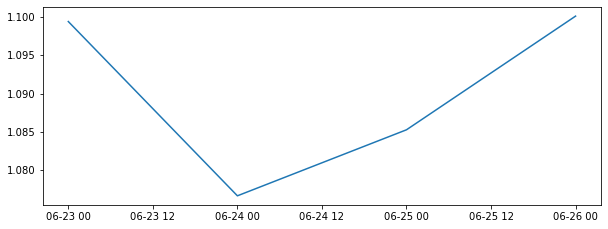

In [45]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ4]  F0 Vibration'])

#### [SEQ5]  F0 Vibration / 진동력

In [46]:
SEQ5_Vibration = pd.DataFrame(df_mean, columns= ['[SEQ5]  F0 Vibration'])
SEQ5_Vibration

,[SEQ5] F0 Vibration
DATE,
2021-06-23,1.639663
2021-06-24,1.682462
2021-06-25,1.565089
2021-06-26,1.622348


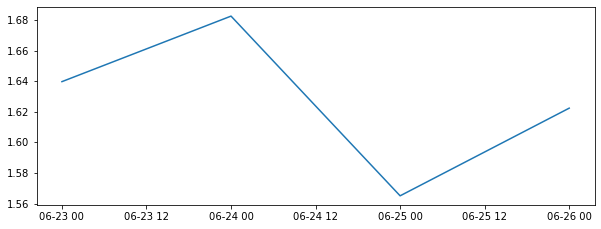

In [50]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ5]  F0 Vibration'])

#### [SEQ6]  F0 Vibration / 진동력

In [51]:
SEQ6_Vibration = pd.DataFrame(df_mean, columns= ['[SEQ6]  F0 Vibration'])
SEQ6_Vibration

,[SEQ6] F0 Vibration
DATE,
2021-06-23,1.266916
2021-06-24,1.282431
2021-06-25,1.200130
2021-06-26,1.240230


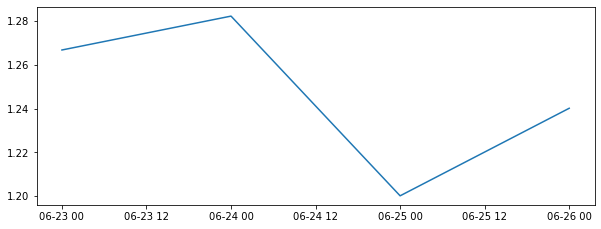

In [52]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df_mean.index, df_mean['[SEQ6]  F0 Vibration'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21785 entries, 2021-06-23 10:05:07 to 2021-06-26 16:14:45
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NUM                   21785 non-null  int64  
 1   CH                    21785 non-null  object 
 2   [SEQ1]  RisingTime    21785 non-null  float64
 3   [SEQ1]  FallingTime   21785 non-null  float64
 4   [SEQ2]  F0 Current    21785 non-null  float64
 5   [SEQ2]  F0 Vibration  21785 non-null  float64
 6   [SEQ2]  Noise Touch   21785 non-null  float64
 7   [SEQ2]  Noise THD1    21785 non-null  float64
 8   [SEQ2]  Noise Band1   21785 non-null  float64
 9   [SEQ3]  F0 Frequency  21785 non-null  float64
 10  [SEQ3]  F0 Vibration  21785 non-null  float64
 11  [SEQ3]  Noise Touch   21785 non-null  float64
 12  [SEQ3]  Noise THD1    21785 non-null  float64
 13  [SEQ3]  Noise Band1   21785 non-null  float64
 14  [SEQ4]  F0 Vibration  21785 non-nul

### [SEQ2], [SEQ3] 소비전류.주파수.진동값에 대한 상관성

##### 검사 항목 중 noise관련 부분은 실제 정규성을 띄지 않는것으로 보여 제외한다.

#### 1. SEQ2

In [55]:
X = df['[SEQ2]  F0 Current']
Y = df['[SEQ2]  F0 Vibration']

In [61]:
np.corrcoef(X,Y)[0,1]

0.35738591801239444

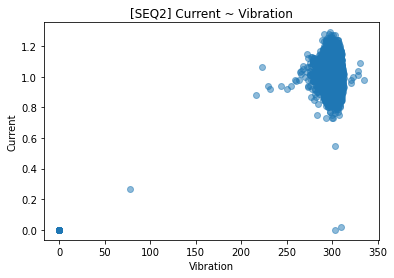

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('[SEQ2] Current ~ Vibration')
plt.xlabel('Vibration')
plt.ylabel('Current')
plt.show()

##### 소비전류와 진동값의 상관관계 : 0.357
##### [SEQ2]  F0 Current(전류), [SEQ2]  F0 Vibration(진동값)는 보통의 양의 상관관계를 갖는다.

#### 2. SEQ3

In [63]:
X = df['[SEQ3]  F0 Frequency']
Y = df['[SEQ3]  F0 Vibration']

In [64]:
np.corrcoef(X,Y)[0,1]

0.38239024400608906

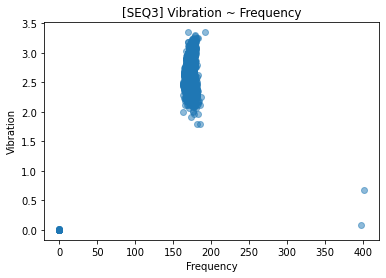

In [67]:
plt.scatter(X, Y, alpha=0.5)
plt.title('[SEQ3] Vibration ~ Frequency')
plt.xlabel('Frequency')
plt.ylabel('Vibration')
plt.show()

##### 소비전류와 진동값의 상관관계 : 0.382
##### [SEQ3]  F0 Frequency(주파수), [SEQ2]  F0 Vibration(진동값)는 보통의 양의 상관관계를 갖는다.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21785 entries, 2021-06-23 10:05:07 to 2021-06-26 16:14:45
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NUM                   21785 non-null  int64  
 1   CH                    21785 non-null  object 
 2   [SEQ1]  RisingTime    21785 non-null  float64
 3   [SEQ1]  FallingTime   21785 non-null  float64
 4   [SEQ2]  F0 Current    21785 non-null  float64
 5   [SEQ2]  F0 Vibration  21785 non-null  float64
 6   [SEQ2]  Noise Touch   21785 non-null  float64
 7   [SEQ2]  Noise THD1    21785 non-null  float64
 8   [SEQ2]  Noise Band1   21785 non-null  float64
 9   [SEQ3]  F0 Frequency  21785 non-null  float64
 10  [SEQ3]  F0 Vibration  21785 non-null  float64
 11  [SEQ3]  Noise Touch   21785 non-null  float64
 12  [SEQ3]  Noise THD1    21785 non-null  float64
 13  [SEQ3]  Noise Band1   21785 non-null  float64
 14  [SEQ4]  F0 Vibration  21785 non-nul

### Q-Q plot(Quantile-Quantile Plot)을 통한 정규성 검정 

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([ 0. ,  0. ,  0. , ..., 28.5, 29.9, 33.7])),
 (1.0899170324944407, 0.5914895570346573, 0.6195834247460291))

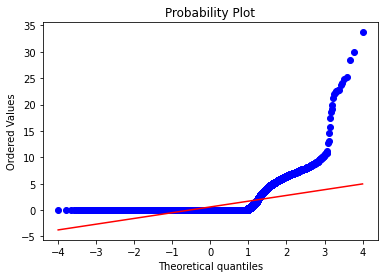

In [10]:
stats.probplot(df['[SEQ2]  Noise Touch'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([ 0. ,  0. ,  0. , ..., 14.3, 22.5, 46.4])),
 (0.5112207135244163, 3.6519210465916916, 0.8152472197916937))

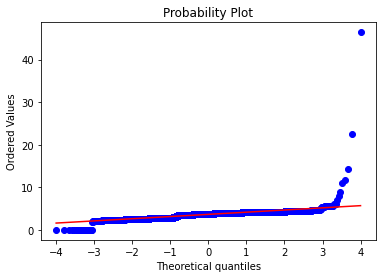

In [11]:
stats.probplot(df['[SEQ2]  Noise THD1'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([ 0. ,  0. ,  0. , ..., 23.9, 28.6, 29.6])),
 (2.137707761836152, 1.4526279550149195, 0.747280627527349))

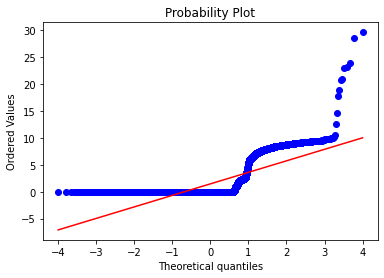

In [12]:
stats.probplot(df['[SEQ2]  Noise Band1'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([ 0. ,  0. ,  0. , ..., 13.4, 13.5, 21.4])),
 (0.669305528805993, 5.76478769795731, 0.9515321521328064))

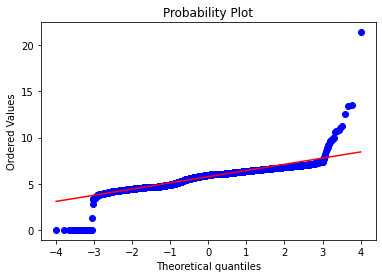

In [78]:
stats.probplot(df['[SEQ1]  RisingTime'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([ 0. ,  0. ,  0. , ..., 34.2, 34.2, 34.4])),
 (3.2203602017183774, 19.858930456736285, 0.9925597660652048))

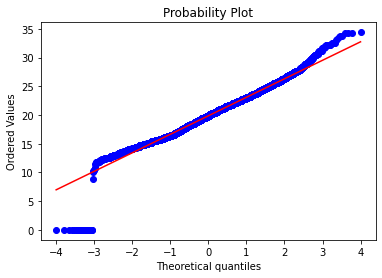

In [79]:
stats.probplot(df['[SEQ1]  FallingTime'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([  0. ,   0. ,   0. , ..., 328.6, 330.1, 334.8])),
 (5.894961267145045, 300.7359880651825, 0.5393512098730182))

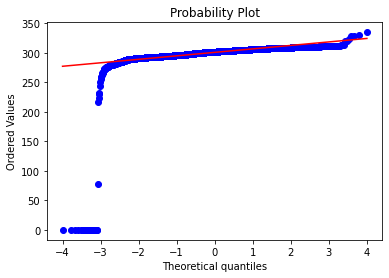

In [73]:
stats.probplot(df['[SEQ2]  F0 Current'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([0.  , 0.  , 0.  , ..., 1.28, 1.28, 1.29])),
 (0.07121677770181695, 1.0136837273353223, 0.9373811582659447))

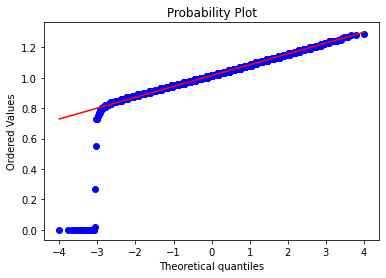

In [74]:
stats.probplot(df['[SEQ2]  F0 Vibration'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([  0. ,   0. ,   0. , ..., 192.4, 397.9, 401.1])),
 (3.094973726023268, 171.3513105347716, 0.5018850155644311))

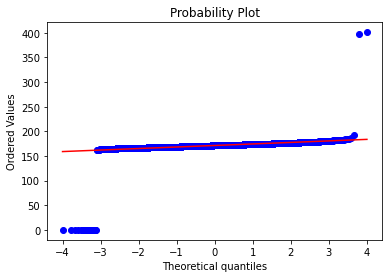

In [75]:
stats.probplot(df['[SEQ3]  F0 Frequency'], plot=plt)

((array([-3.99891228, -3.78378464, -3.66611185, ...,  3.66611185,
          3.78378464,  3.99891228]),
  array([0.  , 0.  , 0.  , ..., 3.31, 3.35, 3.35])),
 (0.16664113539144554, 2.6709584576543492, 0.9275906874094456))

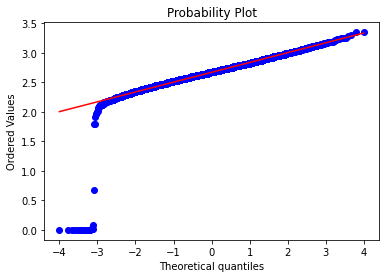

In [76]:
stats.probplot(df['[SEQ3]  F0 Vibration'], plot=plt)

In [ ]:
stats.probplot(df['[SEQ3]  F0 Vibration'], plot=plt)